In [1]:
### Handling Imbalance Classes in Python;
### As we understand, credit card fraud detection has unbalanced data set; 
### having a higher number of non-fraud instances than fraudulent instances

### UnderSampling: ---> it means taking the less number of majority class (In our case taking less number of Normal transactions so that our new data will be balanced
### OverSampling: ---> it means using replicating the data of minority class (fraud class) so that we can have a balanced data
### SMOTE: ---> it is also a type of oversampling but in this we will make the synthetic example of Minority data and will give as a balanced data


         ##### First we will start with the Undersampling and will try to classify using these Models

## Lets start with importing libraries and data;


import pandas as pd # to import csv and for data manipulation
import matplotlib.pyplot as plt # to plot graph
import seaborn as sns # for intractve graphs
import numpy as np # for linear algebra
import datetime # to dela with date and time
%matplotlib inline
from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split # to split the data
from sklearn.cross_validation import KFold # For cross vbalidation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
import warnings
warnings.filterwarnings('ignore')

C:\Users\sakri18\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
data=pd.read_csv("C:/users/sakri18/Downloads/creditcard.csv")
data.head(10) ## Displaying first 10 rows of the data;
## Now, performing the data exploration step;
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

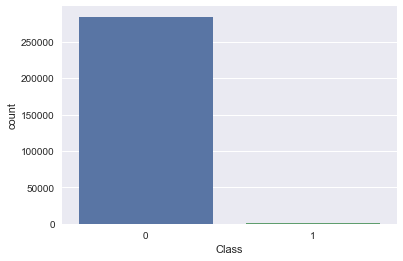

In [6]:
##using 'Seaborn' Visualization; 
sns.countplot("Class",data=data) ##We can  notice the class imbalance here; count (Class '0') >> (Class '1')

In [12]:
### Now, let us analyze the percentage;
Count_Normal_transacation = len(data[data["Class"]==0])
Count_Fraud_transacation = len(data[data["Class"]==1])
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of normal transacation is",Percentage_of_Normal_transacation*100) ## 99.82%

Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("percentage of fraud transacation",Percentage_of_Fraud_transacation*100) ## 0.1727%

percentage of normal transacation is 99.82725143693798
percentage of fraud transacation 0.1727485630620034


In [ ]:
### Inferences;
## Hence in data there is only 0.17 % are the fraud transcation while 99.83 are valid transcation
## So now we have to do resampling of this data
## before doing resampling lets have look at the amount related to valid transcation and fraud transcation

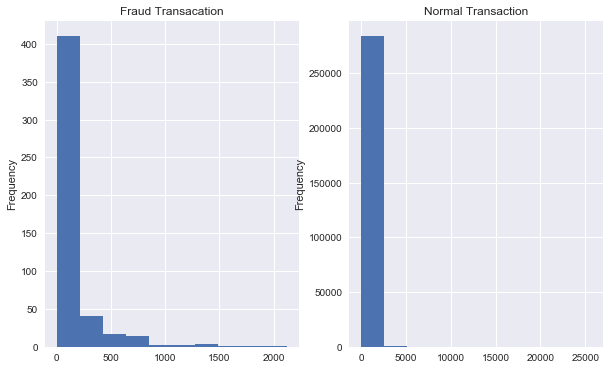

In [13]:
Fraud_transacation = data[data["Class"]==1] ## Minority Class;
Normal_transacation= data[data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation.Amount.plot.hist(title="Fraud Transacation")
plt.subplot(122)
Normal_transacation.Amount.plot.hist(title="Normal Transaction")

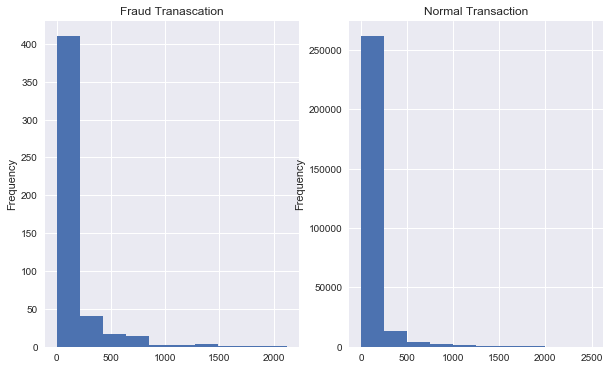

In [14]:
 #the distribution for Normal transction is not clear and it seams that all transaction are less than 2.5 K
# So plot graph for same 
Fraud_transacation = data[data["Class"]==1]
Normal_transacation= data[data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation[Fraud_transacation["Amount"]<= 2500].Amount.plot.hist(title="Fraud Tranascation")
plt.subplot(122)
Normal_transacation[Normal_transacation["Amount"]<=2500].Amount.plot.hist(title="Normal Transaction")

In [27]:
#  for undersampling we need a portion of majority class and will take whole data of minority class
# 'count fraud transaction' is the total number of fraud transaction
#  Minority Classes are the Class '1' instances;
## Now, lets take the index of the fraudulent classes;

fraud_indices=np.array(data[data.Class==1].index)
normal_indices=np.array(data[data.Class==0].index)

#now let us a define a function for make undersample data with different proportion
#different proportion means with different proportion of normal classes of data

def undersample(normal_indices,fraud_indices,times):
    normal_indices_undersample=np.array(np.random.choice(normal_indices,(times*Count_Fraud_transacation),replace=False))
    undersample_data = np.concatenate([fraud_indices,normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    #print("the normal transacation proportion is :",len(undersample_data[undersample_data.Class==0])/len(undersample_data[undersample_data.Class]))
    #print("the fraud transacation proportion is :",len(undersample_data[undersample_data.Class==1])/len(undersample_data[undersample_data.Class]))
    #print("total number of record in resampled data is:",len(undersample_data[undersample_data.Class]))
    return(undersample_data)

In [20]:
## first make a model function for modeling with confusion matrix
def model(model,features_train,features_test,labels_train,labels_test):
    clf= model
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))

In [21]:
def data_prepration(x): # preparing data for training and testing as we are going to use different data 
    #again and again so make a function
    x_features= x.ix[:,x.columns != "Class"]
    x_labels=x.ix[:,x.columns=="Class"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.3)
    print("length of training data")
    print(len(x_features_train))
    print("length of test data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

In [ ]:
# before starting we should standridze our ampount column
data["Normalized Amount"] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
data.drop(["Time","Amount"],axis=1,inplace=True)
data.head()

the undersample data for 1 proportion

------------------------------------------------------------

the model classification for 1 proportion

length of training data
688
length of test data
296

the recall for this model is : 0.923076923077
TP 132
TN 151
FP 2
FN 11


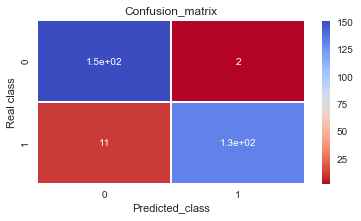


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.99      0.96       153
          1       0.99      0.92      0.95       143

avg / total       0.96      0.96      0.96       296

________________________________________________________________________________________________________
the undersample data for 2 proportion

------------------------------------------------------------

the model classification for 2 proportion

length of training data
1033
length of test data
443

the recall for this model is : 0.81884057971
TP 113
TN 300
FP 5
FN 25


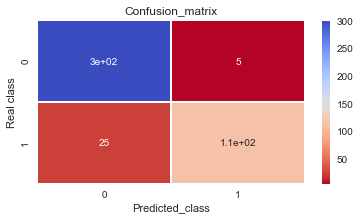


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.92      0.98      0.95       305
          1       0.96      0.82      0.88       138

avg / total       0.93      0.93      0.93       443

________________________________________________________________________________________________________
the undersample data for 3 proportion

------------------------------------------------------------

the model classification for 3 proportion

length of training data
1377
length of test data
591

the recall for this model is : 0.807142857143
TP 113
TN 448
FP 3
FN 27


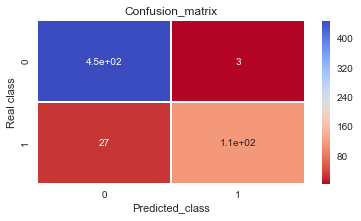


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.94      0.99      0.97       451
          1       0.97      0.81      0.88       140

avg / total       0.95      0.95      0.95       591

________________________________________________________________________________________________________


In [28]:
## Logistic Regression with undersampled data;
for i in range(1,4):
    print("the undersample data for {} proportion".format(i))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,i)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(i))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    print()
    clf=LogisticRegression()
    model(clf,undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test)
    print("________________________________________________________________________________________________________")

the undersample data for 1 proportion

------------------------------------------------------------

the model classification for 1 proportion

length of training data
688
length of test data
296
length of training data
199364
length of test data
85443

the recall for this model is : 0.922580645161
TP 143
TN 82326
FP 2962
FN 12


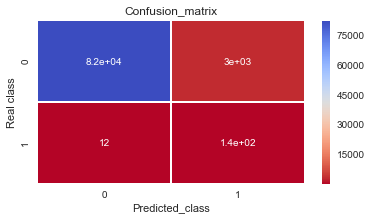


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.97      0.98     85288
          1       0.05      0.92      0.09       155

avg / total       1.00      0.97      0.98     85443

_________________________________________________________________________________________
the undersample data for 2 proportion

------------------------------------------------------------

the model classification for 2 proportion

length of training data
1033
length of test data
443
length of training data
199364
length of test data
85443

the recall for this model is : 0.855072463768
TP 118
TN 84756
FP 549
FN 20


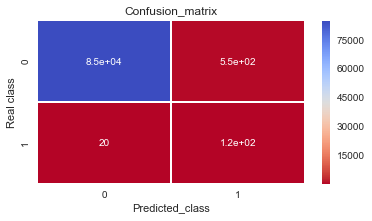


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85305
          1       0.18      0.86      0.29       138

avg / total       1.00      0.99      1.00     85443

_________________________________________________________________________________________
the undersample data for 3 proportion

------------------------------------------------------------

the model classification for 3 proportion

length of training data
1377
length of test data
591
length of training data
199364
length of test data
85443

the recall for this model is : 0.818181818182
TP 117
TN 84657
FP 643
FN 26


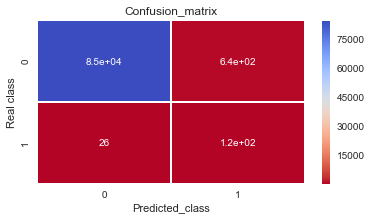


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85300
          1       0.15      0.82      0.26       143

avg / total       1.00      0.99      0.99     85443

_________________________________________________________________________________________


In [29]:
#let us train this model using undersample data and test for the whole data test set 
for i in range(1,4):
    print("the undersample data for {} proportion".format(i))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,i)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(i))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    data_features_train,data_features_test,data_labels_train,data_labels_test=data_prepration(data) 
    #the partion for whole data
    print()
    clf=LogisticRegression()
    model(clf,undersample_features_train,data_features_test,undersample_labels_train,data_labels_test)
    # here training for the undersample data but tatsing for whole data
    print("_________________________________________________________________________________________")
    

the undersample data for 1 proportion

------------------------------------------------------------

the model classification for 1 proportion

length of training data
688
length of test data
296

the recall for this model is : 0.075
TP 12
TN 136
FP 0
FN 148


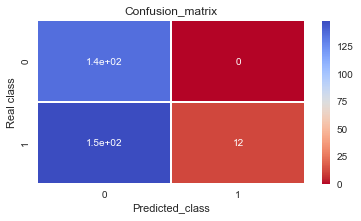


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.48      1.00      0.65       136
          1       1.00      0.07      0.14       160

avg / total       0.76      0.50      0.37       296

________________________________________________________________________________________________________
the undersample data for 2 proportion

------------------------------------------------------------

the model classification for 2 proportion

length of training data
1033
length of test data
443

the recall for this model is : 0.05
TP 7
TN 303
FP 0
FN 133


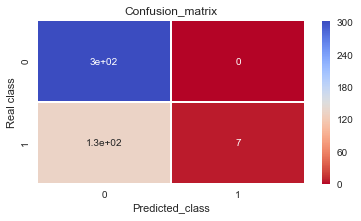


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.69      1.00      0.82       303
          1       1.00      0.05      0.10       140

avg / total       0.79      0.70      0.59       443

________________________________________________________________________________________________________
the undersample data for 3 proportion

------------------------------------------------------------

the model classification for 3 proportion

length of training data
1377
length of test data
591

the recall for this model is : 0.0709219858156
TP 10
TN 450
FP 0
FN 131


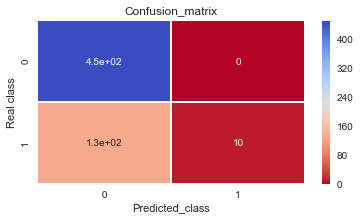


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       0.77      1.00      0.87       450
          1       1.00      0.07      0.13       141

avg / total       0.83      0.78      0.70       591

________________________________________________________________________________________________________


In [31]:
## Now, SVM with undersampled data;
for i in range(1,4):
    print("the undersample data for {} proportion".format(i))
    print()
    Undersample_data = undersample(normal_indices,fraud_indices,i)
    print("------------------------------------------------------------")
    print()
    print("the model classification for {} proportion".format(i))
    print()
    undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test=data_prepration(Undersample_data)
    print()
    clf= SVC()# here we are just changing classifier
    model(clf,undersample_features_train,undersample_features_test,undersample_labels_train,undersample_labels_test)
    print("________________________________________________________________________________________________________")